<a href="https://colab.research.google.com/github/learneverythingai/Shivam-Modi-Data-Science-Analytics-Course/blob/main/Deep%20Learning%20Course/Image_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The Author and Instructor of this Notebook is **Shivam Modi**.

## LinkedIn: https://www.linkedin.com/in/shivam-modi-datascientist/

# Image Processing
Image processing means processing an image and this includes numerous types of techniques. The final output can in the form of image or its corresponding feature of the image. This result can be used for further prediction or classification.

##What is an image?
An image can be represented as a combination of $F(x,y)$ where $x$ and $y$ represent spatial coordinates i.e., a 2D function. Where $F$ represent the intensity of that particular image at that point i.e., $(x,y)$. It is an array of pixels arranged in rows and coloumns. These pixels represent the information about the intensity and color.
<p> An image can also be represented as 3D function i.e., a combination of $F(x,y,z)$ and this coordinates represent spatial coordinates. This type of image is also called RGB image.


1.   RGB image: It contains three layers of 2D image, these layers are Red, Green, and Blue channels.
2.  Grayscale image: These images contain shades of black and white and contain only a single channel.


# Let code to perform Image Processing

In [ ]:
# importing libraries
import tensorflow 
import keras  
import os
import glob 
import skimage
from skimage import io 
import random 
import numpy as np
import matplotlib.pyplot as plt  


In [ ]:
#mount the drive to load the data set
from google.colab import drive
drive.mount("/content/drive/")

Mounted at /content/drive/


Dataset can be download from : [Dataset](https://drive.google.com/drive/folders/1DRSalsLRqKQP7ILxomE6qPSsEOK17Cpx?usp=sharing)

In [ ]:
# Importing and Loading the data into a data frame

dataset_path = '/content/drive/MyDrive/Animals'
class_names = ['Cheetah', 'Jaguar', 'Leopard', 'Lion','Tiger']

# apply glob module to retrieve files/pathnames  

animal_path = os.path.join(dataset_path, class_names[1], '*')
animal_path = glob.glob(animal_path)

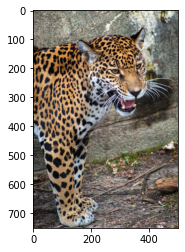

In [ ]:
# accessing an image file from the dataset classes
image = io.imread(animal_path[20])  

# plotting the original image
i, (im1) = plt.subplots(1)
i.set_figwidth(15)
im1.imshow(image)

Text(0.5, 0.98, 'Original & RGB image channels')

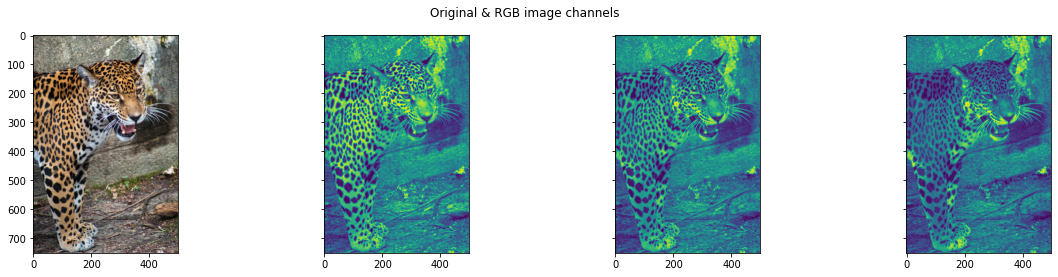

In [ ]:
#let's explore the RGB channels of our original image
# plotting the original image and the RGB channels  

i, (im1, im2, im3, im4) = plt.subplots(1, 4, sharey=True)
i.set_figwidth(20) 

im1.imshow(image)  #Original image
im2.imshow(image[:, : , 0]) #Red
im3.imshow(image[:, : , 1]) #Green
im4.imshow(image[:, : , 2]) #Blue
i.suptitle('Original & RGB image channels')

#Grayscale Conversion
It simply convert the color image to black & white. It help to reduce computational complexity while applying machile learning algorithms. It is done because while classification color don't need to be recognized, which reduces the number of pixels and hence reduces the computational complexity.

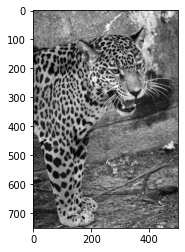

In [ ]:
gray_image = skimage.color.rgb2gray(image)
plt.imshow(gray_image, cmap = 'gray')

# Normalization
In this image data pixel is projected in predefined range i.e., $(0,1)$ or $(-1,1)$. Scaling all images to an equal range of $[0,1]$ or $[-1,1]$ allows all images to contribute equally. Since low pixel images require high learning rate which help to provide a standard learning rate for the image.

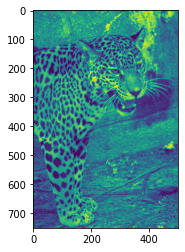

In [ ]:
norm_image = (gray_image - np.min(gray_image)) / (np.max(gray_image) - np.min(gray_image))
plt.imshow(norm_image)

# Data Augumentation
It is a process of making alternative of existing data to increase its diversity without collecting new data. It is a technique used for enlarging a dataset. Standard data augmentation techniques include horizontal & vertical flipping, rotation, cropping, shearing, etc.

#Shifting
We can shift the pixels of the image either horizontally or vertically; this is done by adding a certain constant value to all the pixels.

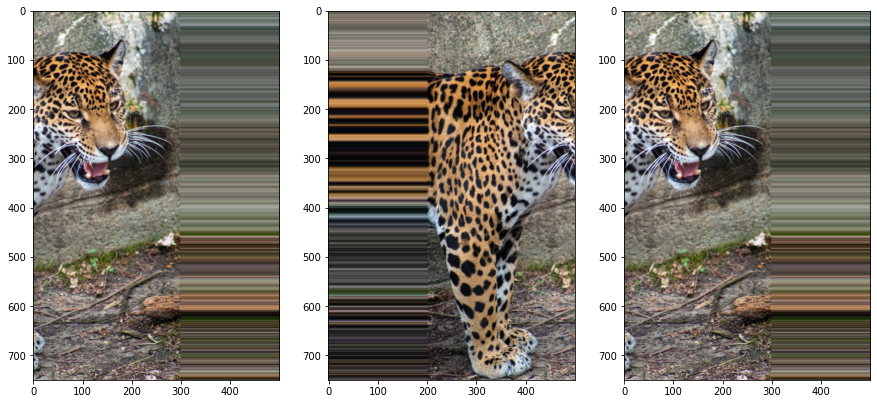

In [ ]:
# import libraries

from numpy import expand_dims
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator

# convert to numpy array
data = img_to_array(image)

# expand dimension to one sample
samples = expand_dims(image, 0)

# create image data augmentation generator
datagen = ImageDataGenerator(width_shift_range=[-200,200])

# create an iterator
it = datagen.flow(samples, batch_size=1)
fig, im = plt.subplots(nrows=1, ncols=3, figsize=(15,15))

# generate batch of images
for i in range(3):

    # convert to unsigned integers
    image = next(it)[0].astype('uint8')
 
    # plot image
    im[i].imshow(image) 

#Flipping
Flipping images is a great augmentation technique and it makes sense to use it with a lot of different objects.

ImageDataGenerator class has parameters horizontal_flip and vertical_flip  for flipping along the vertical or the horizontal axis. 

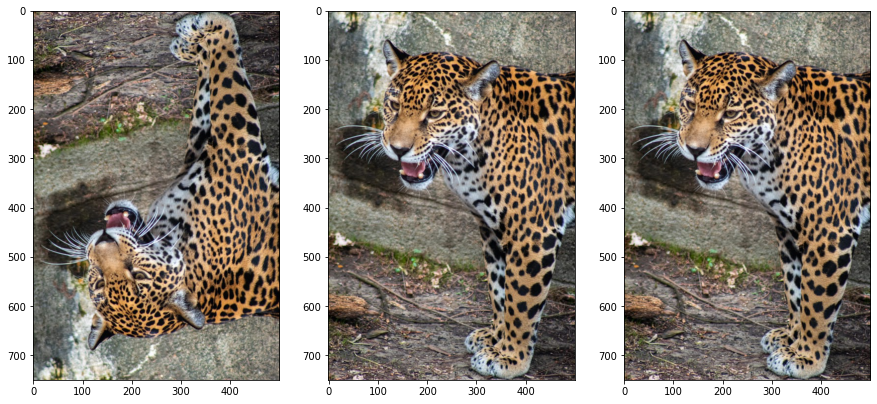

In [ ]:
# ImageDataGenerator for flipping
datagen1 = ImageDataGenerator(horizontal_flip=True, vertical_flip=True)
# create an iterator
it = datagen1.flow(samples, batch_size=1)
fig, im = plt.subplots(nrows=1, ncols=3, figsize=(15,15))

# generate batch of images
for i in range(3):

    # convert to unsigned integers
    image = next(it)[0].astype('uint8')
 
    # plot image
    im[i].imshow(image) 

# Image Rotation
Image rotation is one of the widely used augmentation techniques and allows the model to become invariant to the orientation of the object.

ImageDataGenerator class allows you to randomly rotate images through any degree between 0 and 360 by providing an integer value in the rotation_range argument.

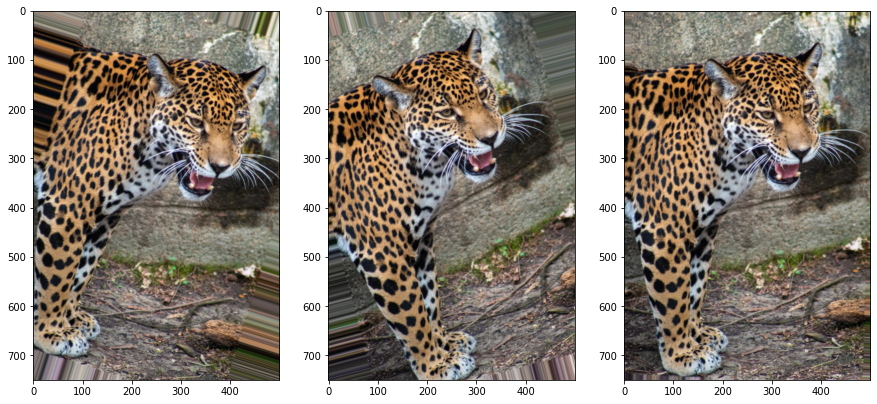

In [ ]:
datagen2 = ImageDataGenerator(rotation_range=30, fill_mode='nearest')
# create an iterator
it = datagen2.flow(samples, batch_size=1)
fig, im = plt.subplots(nrows=1, ncols=3, figsize=(15,15))

# generate batch of images
for i in range(3):

    # convert to unsigned integers
    image = next(it)[0].astype('uint8')
 
    # plot image
    im[i].imshow(image) 

# Random Brightness
It randomly changes the brightness of the image. It is also a very useful augmentation technique because most of the time our object will not be under perfect lighting condition

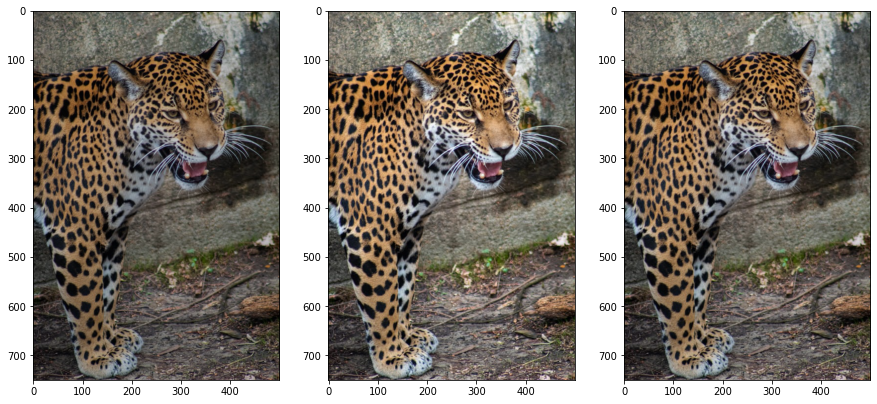

In [ ]:
datagen3 = ImageDataGenerator(brightness_range=[0.4,1.7])
# create an iterator
it = datagen3.flow(samples, batch_size=1)
fig, im = plt.subplots(nrows=1, ncols=3, figsize=(15,15))

# generate batch of images
for i in range(3):

    # convert to unsigned integers
    image = next(it)[0].astype('uint8')
 
    # plot image
    im[i].imshow(image) 

# Random Zoom
The zoom augmentation either randomly zooms in on the image or zooms out of the image.

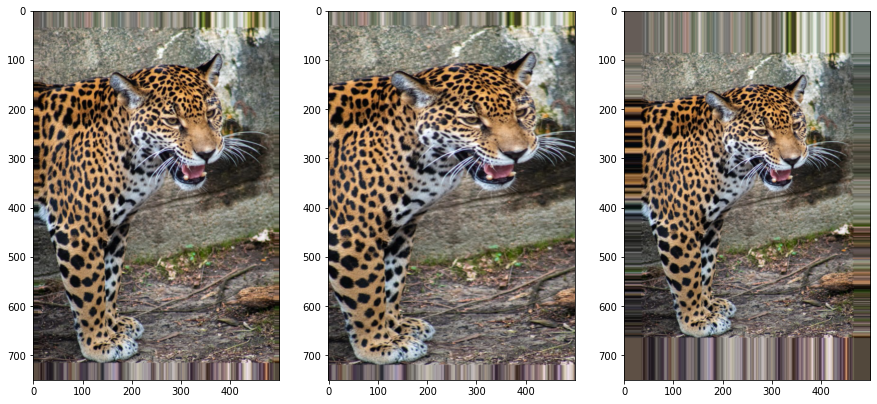

In [ ]:
datagen4 = ImageDataGenerator(zoom_range=0.3)
# create an iterator
it = datagen4.flow(samples, batch_size=1)
fig, im = plt.subplots(nrows=1, ncols=3, figsize=(15,15))

# generate batch of images
for i in range(3):

    # convert to unsigned integers
    image = next(it)[0].astype('uint8')
 
    # plot image
    im[i].imshow(image) 